<a href="https://colab.research.google.com/github/sleone1/sleone1.github.io/blob/main/golfgolfgolf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction
---

If you watch a PGA Tour event, it is clear that there is no "one size fits all" pattern to match the players as they all differ in age, shape, equipment and, most importantly, skill. From clearly large and strong players, such as the likes of Bryson DeChambeau, who can pound the ball 400+ yards in the air, to those who do not stand out in appearance nor ball driving strength, like Jordan Spieth, who is instead known for his lengthy putting skills, dominance on the PGA Tour comes in all different shapes and sizes. 

In this tutorial, we hope to learn which skills translate to the most success on the PGA Tour. The questions we hope to answer include:
1. Is the age of the golfer relevant? Is it better to be newer on tour but with a fresh set of legs, or older and more experienced?
2. Is it more important to be an accurate driver, or a long driver?
3. How many bogeys is too many? How much does 3-putting hurt a player?

We also hope to develop a model that will predict the changes of winning based on skill measures present in the dataset, including driving distance, shot locations, and recovery ability.

We measure success on the PGA Tour based on Top 10 Percentage. With about 50 tour events per year, and 100+ players participating in a given tournament, the odds of outright winning are not in most players' favors. However, golfers are rewarded for their efforts based on their final standing on the leaderboard; the higher on the leaderboard, the more money a given player earns. If a player does not make the cut for specific event, however, that player does not get paid for playing in that tournament. Based on this information, we find landing in the top 10 players of a tournament to be a success. 

The ultimate goal of this tutorial is to teach the data science pipeline, which includes data preprocessing, exploratory data analysis, machine learning for data analysis, and final insights. We follw this structure, introducing data science topics and tools that could be imitated on this dataset or leveraged on other datasets.

Below, we define key rules and terms in the game of golf:
1. A golf course consists of 18 holes. Each hole is designated as either a par 3 (players should get the ball in the hole in 3 shots or less), Par 4 (4 shots or less) or Par 5 (5 shots or less) based on the length or difficulty of a hole.
2. Birdie = ball goes in the hole in one shot LESS than par
3. Bogey = ball goes in the hole in one shot MORE than par
4. Par = ball goes in the hole in exactly as many shots as expected
5. Each tournament consists of 4 rounds, with each player completing 18 holes in each round (72 total holes). After the second round, however, a "cut" is decided. Players who have not reached a certain score by the conclusion of this round are cut from the tournament, and do not play to final two rounds. 
6. The winner of a tournament is the player who takes the least number of shots to complete the 72 holes, or the score that is "the most under par".
A score under par may look like (-2), meaning that the player took 2 less shots than expected; a score over par may look like (+2), meaning the the player took 2 more shots than expected. (E), or "even", means that the player shot exactly par. 
7. With the 18 holes consisting of a mix of par 3s, 4s and 5s, the total par of a professional golf course is either 70, 71 or 72. Depending on the course and weather conditions, a good score can range from the low 60s to an even round (with the rare score in the high 50s).
8. Missed Green in Regulation ("Missed GIR") = for a par 3, players are expected to make it onto the green with their first shot, par 4 with their second shot, and par 5 in their third shot. If it takes more shots than this, it is considered a missed green in regulation.
9. Tee = where the golfers start each hole.
10. Fairway = the shortest grass that players can hit into with their tee shots; where players want to hit the ball to start.
11. Rough = taller grass on the sides of the fairways; more difficult to hit a good shot out of.
12. Green = the smooth putting surface where the hole is.
13. Bunker = sandtraps along the fairway and around the greens.

First, we import the necessary python packages for the rest of the tutorial. These packages aid in reading, storing, and manipulating the data, creating graphs, and fitting and evaluating regression models.

In [66]:
from google.colab import drive
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

## Data Wrangling
---

In [67]:
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/320FinalProject/PGATOUR_data2.csv')

# https://www.kaggle.com/grantruedy/pga-tour-golf-data-2017-season

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
df = df.dropna()
df = df.drop(columns=['POINTS', 'FAIRWAYS_HIT', 'HOLE_OUTS', 'NUMBER_OF_BUNKERS', 'TOTAL_3_PUTTS', 'TOTAL_DRIVES_FOR_320+', 'TOTAL_ROUGH', 'TOTAL_FAIRWAY_BUNKERS', 'TOTAL_ROUNDS', 'SHORTEST_ACT.HANG_TIME', 'GIR_RANK', 'POINTS_BEHIND_LEAD', 'SG_PUTTING_PER_ROUND', 'TOTAL_SG:PUTTING', 'MEASURED_ROUNDS', 'GOING_FOR_GREEN_IN_2%', 'ATTEMPTS_GFG', 'NON-ATTEMPTS_GFG', 'RTP-GOING_FOR_THE_GREEN', 'RTP-NOT_GOING_FOR_THE_GRN', 'SG_PER_ROUND','SG:OTT', 'SG:APR', 'SG:ARG', 'AVG_SMASH_FACTOR', 'HIGHEST_SF', 'LOWEST_SF', 'AVG_LAUNCH_ANGLE', 'LOWEST_LAUNCH_ANGLE', 'STEEPEST_LAUNCH_ANGLE', 'AVG_SPIN_RATE', 'HIGHEST_SPIN_RATE', 'LOWEST_SPIN_RATE', 'AVG_HANG_TIME', 'LONGEST_ACT.HANG_TIME', 'SHORTEST_CARRY_DISTANCE' ])

In [69]:
# rounds per event - who made the cut more than missed
# win percentage
# top 10 percentage

In [70]:
win_percentage = []
for index, row in df.iterrows():
  win_percentage.append((row['NUMBER_OF_WINS']/row['EVENTS_PLAYED'])*100)

df['WIN_PERCENTAGE'] = win_percentage

In [71]:
missed_gir_percentage = []
for index, row in df.iterrows():
  missed_gir_percentage.append((row['MISSED_GIR']/row['HOLES_PLAYED'])*100)

df['MISSED_GIR_%'] = missed_gir_percentage

top_10_percentage = []
for index, row in df.iterrows():
  top_10_percentage.append((row['NUMBER_OF_TOP_Tens']/row['EVENTS_PLAYED'])*100)

df['TOP_10_PERCENTAGE'] = top_10_percentage

rounds_per_event_avg = []
for index, row in df.iterrows():
  rounds_per_event_avg.append((row['ROUNDS_PLAYED']/row['EVENTS_PLAYED']))

df['AVG_NUMBER_ROUNDS_PER_EVENT'] = rounds_per_event_avg

age_groups = []

for index, row in df.iterrows():
  if row['AGE'] < 30:
    age_groups.append(1)
  elif row['AGE'] >= 30 and row['AGE'] < 40:
    age_groups.append(2)
  else:
    age_groups.append(3)

df['AGE_GROUP'] = age_groups

df.head()

,Player,EVENTS_PLAYED,NUMBER_OF_WINS,NUMBER_OF_TOP_Tens,ROUNDS_PLAYED,AVG_Driving_DISTANCE,UP_AND_DOWN_%,PAR_OR_BETTER,MISSED_GIR,FAIRWAY_HIT_%,POSSIBLE_FAIRWAYS,SAND_SAVE%,NUMBER_OF_SAVES,TOTAL_O/U_PAR,Three_PUTT%,DRIVES_320+%,TOTAL_DRIVES,ROUGH_TENDNECY%,FAIRWAY_BUNKER%,AVG_CLUB_HEAD_SPEED,FASTEST_CH_SPEED,SLOWEST_CH_SPEED,AVG_BALL_SPEED,FASTEST_BALL_SPEED,SLOWEST_BALL_SPEED,AVG_CARRY_DISTANCE,LONGEST_CARRY_DISTANCE,AVG_SCORE,TOTAL_STROKES,MAKES_BOGEY%,BOGEYS_MADE,HOLES_PLAYED,AGE,WIN_PERCENTAGE,MISSED_GIR_%,TOP_10_PERCENTAGE,AVG_NUMBER_ROUNDS_PER_EVENT,AGE_GROUP
0,Aaron Baddeley,27.0,0.0,1.0,84.0,295.5,62.09,303.0,488.0,52.18,1031.0,56.25,72.0,32.0,2.49,7.07,920,35.86,7.5,113.89,118.45,110.22,170.68,174.72,166.01,278.2,312.6,70.850,5518.0,16.24,228.0,1404.0,37.0,0.000000,34.757835,3.703704,3.111111,2
1,Aaron Wise,27.0,1.0,4.0,82.0,303.4,56.59,249.0,440.0,63.29,1087.0,48.80,61.0,38.0,3.44,11.82,"1,032",24.34,7.0,114.40,117.45,111.03,171.87,175.64,167.50,282.5,314.6,70.276,5888.0,16.53,250.0,1512.0,22.0,3.703704,29.100529,14.814815,3.037037,1
2,Abraham Ancer,29.0,0.0,5.0,94.0,296.3,63.23,356.0,563.0,63.06,1286.0,54.38,87.0,31.0,2.66,12.00,"1,158",28.68,5.6,111.85,115.87,108.23,167.57,174.44,160.94,275.1,305.8,70.659,6745.0,14.76,255.0,1728.0,27.0,0.000000,32.581019,17.241379,3.241379,1
3,Adam Hadwin,24.0,0.0,3.0,88.0,289.7,59.04,284.0,481.0,65.18,1166.0,48.15,78.0,42.0,2.31,7.81,896,23.52,6.8,111.69,115.91,108.55,168.20,171.03,162.51,277.7,307.7,70.750,6280.0,15.61,250.0,1602.0,30.0,0.000000,30.024969,12.500000,3.666667,2
4,Adam Schenk,28.0,0.0,1.0,86.0,305.5,54.55,252.0,462.0,57.67,1115.0,42.36,61.0,51.0,3.26,15.54,920,31.98,6.3,120.59,123.73,116.98,177.58,181.34,171.12,283.0,305.0,71.370,5683.0,16.88,243.0,1440.0,26.0,0.000000,32.083333,3.571429,3.071429,1


## Exploratory Data Analysis
---

In [72]:
# closer to 4 = made more cuts
# exactly 3 = made exactly as many cuts as missed
# under 3 = missed more cuts than made


# avg_driving_distance, up_and_down_%, fairway_hit_%, sand_save_%, three_putt_%, rough_tendency%, fairway_bunker%, avg_ch_speed, makes_bogey%
# does clubhead speed equate to ball speed?
# carry distance vs. driving distance
# 

#### Does age matter?

Text(0, 0.5, 'Number of Players')

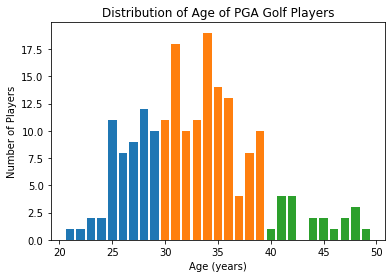

In [73]:
# bar graph of age frequencies colored by age group
for i, d in df.groupby('AGE_GROUP'):
  age_counts = d['AGE'].value_counts().sort_index()

  plt.bar(age_counts.index, age_counts.values)

plt.title("Distribution of Age of PGA Golf Players")
plt.xlabel("Age (years)")
plt.ylabel("Number of Players")

In [74]:
def set_axis_style(ax, labels):
    ax.get_xaxis().set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1))
    ax.set_xticklabels(labels)
    ax.set_xlim(0.25, len(labels) + 0.75)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


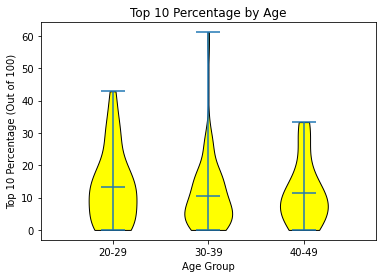

In [75]:
fig, ax = plt.subplots()

top10_1 = []
top10_2 = []
top10_3 = []

for index, row in df.iterrows():
  if row['AGE_GROUP'] == 1:
    top10_1.append(row['TOP_10_PERCENTAGE'])
  elif row['AGE_GROUP'] == 2:
    top10_2.append(row['TOP_10_PERCENTAGE'])
  else:
    top10_3.append(row['TOP_10_PERCENTAGE'])

top_10_by_age = [top10_1, top10_2, top10_3]

years = [1, 2, 3]

# create violin plot for all of the years
ax.set_title('Top 10 Percentage by Age')
ax.set_ylabel("Top 10 Percentage (Out of 100)")
ax.set_xlabel("Age Group")
parts = ax.violinplot(
        top_10_by_age, showmeans=True, showmedians=False,
        showextrema=True)

for pc in parts['bodies']:
    pc.set_facecolor('#FFFF00')
    pc.set_edgecolor('black')
    pc.set_alpha(1)
# set style for the axes
labels = ['20-29', '30-39', '40-49']
set_axis_style(ax, labels)


#### a

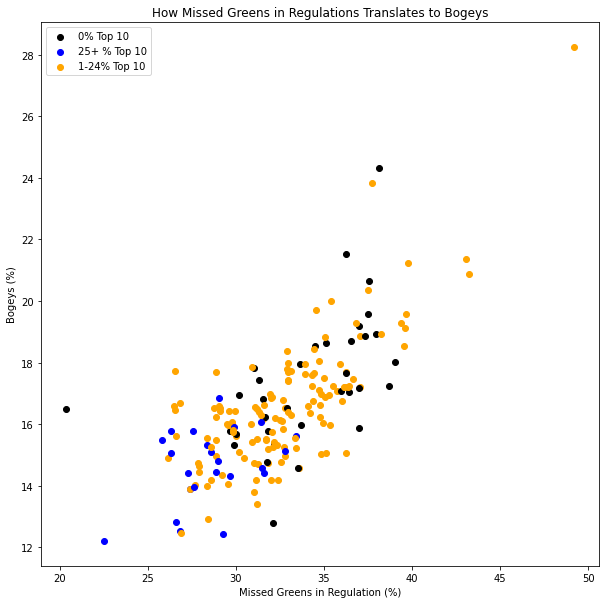

In [76]:
# scatter plot of missed_gir percentage vs bogey percentage
plt.subplots(figsize = (10,10))
for index, row in df.iterrows():
  if row['TOP_10_PERCENTAGE'] == 0:
    one = plt.scatter(marker = "o", x = row['MISSED_GIR_%'], y = row['MAKES_BOGEY%'], color = 'black')
  elif row['TOP_10_PERCENTAGE'] >= 25:
    two = plt.scatter(marker = "o", x = row['MISSED_GIR_%'], y = row['MAKES_BOGEY%'], color = 'blue')
  else:
    three = plt.scatter(marker = "o", x = row['MISSED_GIR_%'], y = row['MAKES_BOGEY%'], color = 'orange')

plt.title('How Missed Greens in Regulations Translates to Bogeys')
plt.xlabel('Missed Greens in Regulation (%)')
plt.ylabel("Bogeys (%)")
plt.legend((one, two, three), ('0% Top 10', '25+ % Top 10', '1-24% Top 10'))

Text(0, 0.5, 'Avearge Ball Speed (mph)')

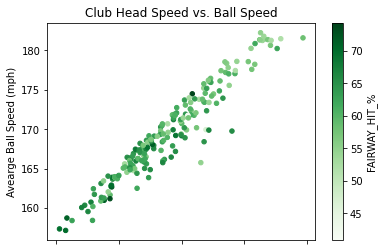

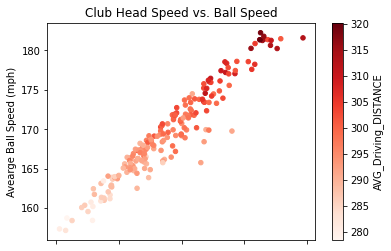

In [77]:
# scatter plots of clubhead speed vs. ball speed
# colored by percentage of fairway
df.plot(x='AVG_CLUB_HEAD_SPEED',                                \
             y='AVG_BALL_SPEED',                             \
             kind='scatter',                          \
             title="Club Head Speed vs. Ball Speed", 
             c='FAIRWAY_HIT_%',
             cmap='Greens')
plt.xlabel("Average Club Head Speed (mph)")
plt.ylabel("Avearge Ball Speed (mph)")

# colored by average driving distance
df.plot(x='AVG_CLUB_HEAD_SPEED',                                \
             y='AVG_BALL_SPEED',                             \
             kind='scatter',                          \
             title="Club Head Speed vs. Ball Speed", 
             c='AVG_Driving_DISTANCE',
             cmap='Reds')
plt.xlabel("Average Club Head Speed (mph)")
plt.ylabel("Avearge Ball Speed (mph)")

#### Investigating correlations between potential features
https://towardsdatascience.com/the-art-of-finding-the-best-features-for-machine-learning-a9074e2ca60d

In [78]:
skills = ['AVG_Driving_DISTANCE', 'UP_AND_DOWN_%', 'MISSED_GIR', 'FAIRWAY_HIT_%', 'POSSIBLE_FAIRWAYS', 'SAND_SAVE%', 'NUMBER_OF_SAVES', 'Three_PUTT%', 'DRIVES_320+%', 'TOTAL_DRIVES', 'ROUGH_TENDNECY%', 'FAIRWAY_BUNKER%', 'AVG_CLUB_HEAD_SPEED', 'FASTEST_CH_SPEED', 'SLOWEST_CH_SPEED', 'AVG_BALL_SPEED', 'FASTEST_BALL_SPEED', 'SLOWEST_BALL_SPEED', 'AVG_CARRY_DISTANCE', 'LONGEST_CARRY_DISTANCE', 'MISSED_GIR_%']
# results = ['EVENTS_PLAYED', 'NUMBER_OF_WINS', 'NUMBER_OF_TOP_Tens', 'ROUNDS_PLAYED', 'PAR_OR_BETTER', 'TOTAL_O/U_PAR', 'AVG_SCORE', 'TOTAL_STROKES', 'HOLES_PLAYED', 'WIN_PERCENTAGE', 'TOP_10_PERCENTAGE', 'AVG_NUMBER_ROUNDS_PER_EVENT', 'MAKES_BOGEY%', 'BOGEYS_MADE']

corr_s = df[skills].corr()
corr_s.style.background_gradient(cmap='coolwarm').set_precision(2).set_properties(**{'font-size': '0pt'})

,AVG_Driving_DISTANCE,UP_AND_DOWN_%,MISSED_GIR,FAIRWAY_HIT_%,POSSIBLE_FAIRWAYS,SAND_SAVE%,NUMBER_OF_SAVES,Three_PUTT%,DRIVES_320+%,ROUGH_TENDNECY%,FAIRWAY_BUNKER%,AVG_CLUB_HEAD_SPEED,FASTEST_CH_SPEED,SLOWEST_CH_SPEED,AVG_BALL_SPEED,FASTEST_BALL_SPEED,SLOWEST_BALL_SPEED,AVG_CARRY_DISTANCE,LONGEST_CARRY_DISTANCE,MISSED_GIR_%
AVG_Driving_DISTANCE,1.00,-0.04,-0.14,-0.40,0.00,-0.07,-0.01,0.14,0.92,0.29,0.13,0.86,0.82,0.86,0.91,0.90,0.88,0.92,0.88,-0.39
UP_AND_DOWN_%,-0.04,1.00,0.01,0.28,0.07,0.58,0.30,-0.38,0.00,-0.26,-0.20,-0.05,-0.05,-0.02,-0.04,-0.05,-0.02,-0.02,-0.02,-0.30
MISSED_GIR,-0.14,0.01,1.00,-0.07,0.91,-0.05,0.77,-0.10,-0.18,0.03,0.15,-0.12,-0.05,-0.15,-0.10,-0.08,-0.12,-0.11,-0.06,0.30
FAIRWAY_HIT_%,-0.40,0.28,-0.07,1.00,0.12,-0.05,-0.05,-0.00,-0.38,-0.91,-0.43,-0.45,-0.47,-0.40,-0.47,-0.47,-0.40,-0.44,-0.41,-0.38
POSSIBLE_FAIRWAYS,0.00,0.07,0.91,0.12,1.00,-0.10,0.71,-0.05,-0.06,-0.14,0.05,-0.01,0.03,-0.03,0.01,0.04,0.00,-0.00,0.05,-0.08
SAND_SAVE%,-0.07,0.58,-0.05,-0.05,-0.10,1.00,0.43,-0.26,-0.02,0.04,-0.02,-0.07,-0.06,-0.07,-0.04,-0.02,-0.07,-0.01,-0.02,-0.07
NUMBER_OF_SAVES,-0.01,0.30,0.77,-0.05,0.71,0.43,1.00,-0.18,-0.03,-0.02,0.17,-0.01,0.04,-0.04,0.02,0.05,-0.01,0.01,0.05,0.13
Three_PUTT%,0.14,-0.38,-0.10,-0.00,-0.05,-0.26,-0.18,1.00,0.13,0.01,0.04,0.14,0.14,0.10,0.10,0.12,0.11,0.12,0.14,0.01
DRIVES_320+%,0.92,0.00,-0.18,-0.38,-0.06,-0.02,-0.03,0.13,1.00,0.30,0.04,0.82,0.79,0.81,0.86,0.85,0.84,0.87,0.84,-0.36
ROUGH_TENDNECY%,0.29,-0.26,0.03,-0.91,-0.14,0.04,-0.02,0.01,0.30,1.00,0.20,0.36,0.37,0.31,0.36,0.35,0.29,0.32,0.31,0.40


## Data Analysis: what makes a winning golf player?
---

Now that we have explored the dataset and relationshps present within it, we use machine learning and hypothesis testing to define these relationships and build a model that will predict a golfer's success given their historical skills.

#### Is par enough to win? 

Par is the number of strokes that an expret golfer is expected to use from tee to hole. In inexperienced players, par is generally the golden standard that one tries to reach, making the number of times a person scores par a relatively strong indication of their performace. In expert golfers like the PGA players in this dataset, however, it is expected that they will match this value, so we expect this value to lose some of its meaning.

To determine this, we run a linear regression between the percentage of holes on which a PGA golfer scores par or better (calculated using the percentage of times they score bogey, the opposite value as par or better) and the percentage of time they place in the top 10 percent at events.

First, we calculate the percentage of holes with par or better for each golfer. Since this is numerical data, no surther transformations need to be performed on these values to be input to the model. We then fit a linear regression model to the feature and target arrays, using the LinearRegression model provided in the sklearn package. The input to this is a 2D array of features, which we shape with numpy.newaxis, and a 1D array of target values, which we directly extract from the dataframe. This produces a model, defined by the correlation coefficient and a intercept, which we then display and overlay onto a scatterplot of Holes with Par or Better v. Top 10 Placement.

We perform holdout validation on the dataset, which means we train the model on a subset of the data, then test the model on the rest. We use a 70-30 train-test split, done with the sklearn train_test_split method. The model is trained on the 70%.

In [79]:
# calculate percentage of holes with par or better scored
df['PAR_OR_BETTER_%'] = 100 - df['MAKES_BOGEY%']

# reshape data to be 2D array of features and array of target
X = df['PAR_OR_BETTER_%'].values[:,np.newaxis]
y = df['TOP_10_PERCENTAGE']

# create linear regression model and fit to data
reg = LinearRegression()
reg.fit(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

# display information and plot of linear regression model
print(f"Coefficient of linear regression model: {reg.coef_}")
print(f"Intercept of linear regression model: {reg.intercept_}")

Coefficient of linear regression model: [2.44621186]
Intercept of linear regression model: -192.85777082589587


The constants for the trained model are displayed above. This means that the relationship between scoring par or better and being in the top ten percent of standings is defined by the following equation:

```
top ten = intercept + coefficient * % par or better
```

Now that we have a prediction model, we can extract statistical values to determine how well the linear model represents the data. This will aswer our question about whether making par is enough to seperate a winning percentage from the crowd. 

First, we extract R^2, R, and the sample size N from the model, using the testing portion of the data to see how the model performs on previously unseen data. We also use the statsmodels library to calculate the p value, again on the testing portion of our data.

R^2 values, known as the [coefficient of determination](https://blog.minitab.com/en/adventures-in-statistics-2/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit), closer to 1 represent data that is closer to the given line; this does not, however, translate to a good model. A [p value](https://statisticsbyjim.com/regression/interpret-coefficients-p-values-regression/) of under 0.05 is generally considered statistically significant. 

In [80]:
# extract correlation coefficient and sample size from model
print(f"R^2: {reg.score(X_test, y_test)}")
print(f"R: {reg.score(X_test, y_test) ** 0.5}")
print(f"N: {len(y_train)}")

# caluclate p value of linear regression model
est = sm.OLS(y_test, X_test)
est2 = est.fit()
print(f"p value: {est2.pvalues[0]}")

R^2: 0.2255696583152058
R: 0.47494174202233036
N: 135
p value: 1.108423242686592e-10


We then visualize the results of our linear regression model, using a scatterplot with the linear regression line overlaid. The closer the points are to the line, the more strongly these two variables are correlated. The slope of the line determines the direction of the relationship, positive or negative.

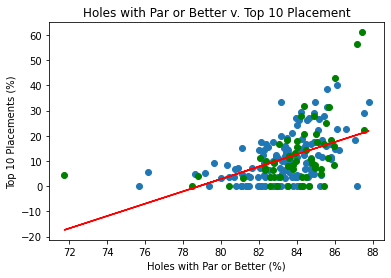

In [81]:
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test, color='g')
plt.title("Holes with Par or Better v. Top 10 Placement")
plt.xlabel("Holes with Par or Better (%)")
plt.ylabel("Top 10 Placements (%)")

plt.plot(X, reg.predict(X), color='r')
plt.show()

The above testing of the regression model does show a correlation between making par and winning, however a very weak one. The p value is under 0.05, which we read a a significant relationship. The R^2 correlation is weak, and the line of best fit does not visually match the trends displayed by the points. This means that alone, making par is not enough to make a winning golf round. 

We will improve upon this regression model in the next section, by adding skill-based features that define a golfer's game.

#### Predicting Winners with Regression

We will now train another linear regression model, with the goal of predicting top ten percentage accurately. To choose the features we will use in this regression, we will use the results of our feature correlation in the exploratory analysis. If any features are strongly correlated, only one is necessary, else they are providing duplicate information. For example, since we include average driving distance, we don't include club or ball speed, since these measures are all closely correlated. From the measures of skill present in the dataset, we narrow it down to the following features: average driving distance, three putt percentage (percentage of holes on which it takes 3+ putts to make the hole), fairway hit percentage, and sand save percentage. 

We then split the data into a 70-30 train-test split, and fit the sklearn LinearRegression model to the training data.

In [82]:
# reshape data to be 2D array of features and array of target
features = ['AVG_Driving_DISTANCE', 'Three_PUTT%', 'FAIRWAY_HIT_%', 'SAND_SAVE%']
X = df[features].values
y = df['TOP_10_PERCENTAGE']

# split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

# create linear regression model and fit to training data
reg = LinearRegression()
reg.fit(X_train, y_train)

# display information and plot of linear regression model
print(f"Coefficients of linear regression model: {reg.coef_}")
print(f"Intercept of linear regression model: {reg.intercept_}")

Coefficients of linear regression model: [ 0.81396363 -5.03070028  0.62641084  0.30325557]
Intercept of linear regression model: -268.57740036094094


The coefficients of the linear model are displayed above, representing the relationship between the feature skills and top ten standings with the following equation:

```
TOP_10_PERCENTAGE = intercept = coef1 * AVG_Driving_DISTANCE + coef2 * Three_PUTT% + coef3 * FAIRWAY_HIT_% + coef4 * SAND_SAVE%
```

We now produce statistical values and graphs based on the test set to evaluate the significance and conclusions of the model. 
* For the test set, we graph the actual vs. predicted values. In a perfect model, this would fall on the line x=y, which we include on the graph for reference.
* We also calculate the actual and predicted distribution, again for the test set. This graph is made using the matplotlib density plot function, with the two lines overlayed to clearly see differences between the two distributions.
* We calculate the regression constants and p values, using the statsmodel function for the p value.

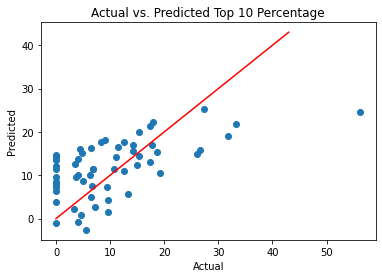

In [83]:
# use linear model to predict testing data
y_pred = reg.predict(X_test)

# scatter plot of actual vs. predicted
plt.scatter(y_test.values, y_pred)
plt.title("Actual vs. Predicted Top 10 Percentage")
plt.xlabel("Actual")
plt.ylabel("Predicted")

# add regressed diagonal line
plt.plot([0, 1, 2, 43], [0, 1, 2, 43], color='r')

Text(0.5, 1.0, 'Distribution Comparison for Actual and Predicted Top 10 Percentage')

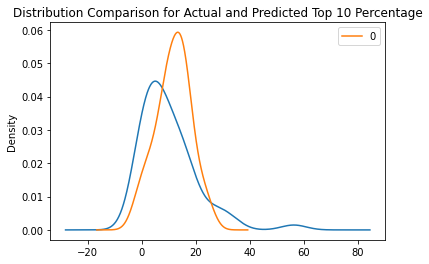

In [84]:
# density plot to compare actual and expected distributions
ax = y_test.plot(kind='density')
pd.DataFrame(y_pred).plot(kind='density', ax=ax)
plt.title('Distribution Comparison for Actual and Predicted Top 10 Percentage')

In [85]:
# extract correlation coefficient and sample size from model
print(f"R^2: {reg.score(X, y)}")
print(f"R: {reg.score(X, y) ** 0.5}")
print(f"N: {len(y)}")

# caluclate pvalue of linear regression model
est = sm.OLS(y, X)
est2 = est.fit()
print(f"p value: {est2.pvalues[0]}")

R^2: 0.4056557707052204
R: 0.6369111168014109
N: 194
p value: 0.027619100848434382


The scatter plot of actual values vs. predicted values has the correct trend, but not very strong. This hints at a correct, but weak regression model. The distribution plot also shows similarities between the actual and predicted values, again suggesting a relatively accurate model.

The statistical values are a more concrete method for determining the strength and significance of our model. The R^2 of our model is not close to 1, which can be interpreted as meaning that our model does not have a strong association, however, the p value indicates that the relationship it does illustrate is statistically significant.

This allows us to use the model to predict the chances of players winning, given their historical demonstration of skill.

*The meanings of the satistical values used have been defined earlier in the tutorial, and can be reviewed further [here](https://blog.minitab.com/en/adventures-in-statistics-2/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit) and [here](https://statisticsbyjim.com/regression/interpret-coefficients-p-values-regression/).*

The regression that we created above has four features, but they each affect the win percentage different amounts. Below, we create a feature importance graph that shows the importance of each feature in the regression. The higher value of the bar, the more the given feature changes the target value. 

To do this, we calculate the standard deviation for each feature. This is because the unit of each measure is different, so we instead use standard deviation as a common unit. We then normalize these values to between 0 and 100, which are what we plot on the matplotlib bar graph.

*A more indepth explanation on the feature importance graph created here can be found at [this link](https://sefiks.com/2019/12/20/a-gentle-introduction-to-feature-importance-in-machine-learning/).*

<BarContainer object of 4 artists>

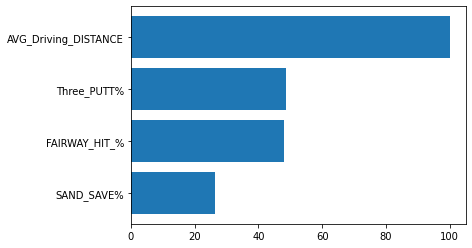

In [86]:
# determine most important features of regression
features_df = pd.DataFrame(reg.coef_, features, columns=['coefficient'])
features_df.coefficient = features_df.coefficient.abs()

# calculate standard deviation for each feature
stdevs = []
for f in features:
    stdev = df[f].std()
    stdevs.append(stdev)
 
 # use standard deviation as shared unit for importance
features_df["stdev"] = np.array(stdevs).reshape(-1,1)
features_df["importance"] = features_df["coefficient"] * features_df["stdev"]

features_df['importance_normalized'] = 100 * features_df['importance'] / features_df['importance'].max()
features_df.sort_values('importance_normalized', inplace=True)

# plot normalized importance as bar graph
plt.barh(features_df.index,features_df['importance_normalized'])

From the above graph, we see that average driving distance is the most important feature for making the top ten in the standings. The other values are fairly even, meaning that besides this value, general skill is also desirable. For the aspiring golfer, this means get working on your drives.

## Conclusion
---